# This notebook includes some visualizations of flight paths on the map of the United States.  Separate maps are produced for each year of 1995, 2005, and 2015.  Only flights in the month of July in each year are looked at.
#### some data seems to be missing for certain states...this requires further investigation to the cause.

In [1]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

C:\Users\Rich\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df_airports = pd.read_excel('./data/airports_new.xlt')
df_airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [5]:
print df_airports[df_airports.state=='WA']

      iata                              airport                     city  \
84     0S7                        Dorothy Scott                 Oroville   
85     0S9       Jefferson County International            Port Townsend   
191    1S0                       Pierce County                  Puyallup   
193    1S5                  Sunnyside Municipal                Sunnyside   
280    2S1                     Vashon Municipal                   Vashon   
283    2S8                               Wilbur                   Wilbur   
299    33S                                 Pru                 Ritzville   
491    55S                             Packwood                 Packwood   
555    63S                   Colville Municipal                 Colville   
561    68S                            Davenport                Davenport   
606    72S                    Rosalia Municipal                  Rosalia   
610    74S                            Anacortes                Anacortes   
688    8S2  

In [6]:
df_airport_codes = pd.read_csv('./data/L_AIRPORT_ID.csv-')
df_airport_codes['Description'] = df_airport_codes['Description'].apply(lambda x: x.split(':')[1].strip())
df_airport_codes[df_airport_codes.Description=='LaGuardia']
df_airport_codes = df_airport_codes.merge(df_airports,left_on='Description',right_on='airport')
df_airport_codes.head()

,Code,Description,iata,airport,city,state,country,lat,long
0,10011,Grand Canyon West,1G4,Grand Canyon West,Peach Springs,AZ,USA,35.992210,-113.816616
1,11398,Grand Canyon West,1G4,Grand Canyon West,Peach Springs,AZ,USA,35.992210,-113.816616
2,10135,Lehigh Valley International,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
3,10136,Abilene Regional,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
4,10141,Aberdeen Regional,ABR,Aberdeen Regional,Aberdeen,SD,USA,45.449056,-98.421833


In [15]:
df_2015 = pd.read_csv('./data/363985671_T_ONTIME_July2015.zip')
df_2005 = pd.read_csv('./data/363985671_T_ONTIME_July2005.zip')
df_1995 = pd.read_csv('./data/363985671_T_ONTIME_July1995.zip')

In [8]:
df_2015 = pd.merge(df_2015, df_airport_codes, left_on='ORIGIN_AIRPORT_ID',right_on='Code')
df_2015 = df_2015.rename(columns={'lat':'origin_lat', 'long':'origin_long'})
df_2015 = pd.merge(df_2015, df_airport_codes, left_on='DEST_AIRPORT_ID',right_on='Code')
df_2015 = df_2015.rename(columns={'lat':'dest_lat', 'long':'dest_long'})
df_2015.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,origin_long,Code_y,Description_y,iata_y,airport_y,city_y,state_y,country_y,dest_lat,dest_long
0,2015,7,1,3,AA,19805,AA,14771,1477102,32457,...,-122.374843,13930,Chicago O'Hare International,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
1,2015,7,2,4,AA,19805,AA,14771,1477102,32457,...,-122.374843,13930,Chicago O'Hare International,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
2,2015,7,3,5,AA,19805,AA,14771,1477102,32457,...,-122.374843,13930,Chicago O'Hare International,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3,2015,7,4,6,AA,19805,AA,14771,1477102,32457,...,-122.374843,13930,Chicago O'Hare International,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
4,2015,7,5,7,AA,19805,AA,14771,1477102,32457,...,-122.374843,13930,Chicago O'Hare International,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464


In [14]:
df_2015.DEST_STATE_NM.unique()

array(['Illinois', 'Florida', 'California', 'Arizona', 'Nevada', 'Hawaii',
       'Virginia', 'North Carolina', 'Pennsylvania', 'Alaska', 'Texas',
       'Indiana', 'Wisconsin', 'Missouri', 'Idaho', 'Oklahoma', 'Wyoming',
       'Montana', 'New York', 'Puerto Rico', 'Iowa', 'Connecticut',
       'Nebraska', 'Tennessee', 'South Dakota', 'Colorado', 'Michigan',
       'Ohio', 'South Carolina', 'North Dakota', 'Vermont', 'Maine',
       'Arkansas', 'Alabama', 'West Virginia', 'Minnesota', 'Kansas',
       'Kentucky', 'New Jersey', 'New Mexico', 'Massachusetts',
       'U.S. Pacific Trust Territories and Possessions'], dtype=object)

In [6]:
df_2005 = pd.merge(df_2005, df_airport_codes, left_on='ORIGIN_AIRPORT_ID',right_on='Code')
df_2005 = df_2005.rename(columns={'lat':'origin_lat', 'long':'origin_long'})
df_2005 = pd.merge(df_2005, df_airport_codes, left_on='DEST_AIRPORT_ID',right_on='Code')
df_2005 = df_2005.rename(columns={'lat':'dest_lat', 'long':'dest_long'})

df_1995 = pd.merge(df_1995, df_airport_codes, left_on='ORIGIN_AIRPORT_ID',right_on='Code')
df_1995 = df_1995.rename(columns={'lat':'origin_lat', 'long':'origin_long'})
df_1995 = pd.merge(df_1995, df_airport_codes, left_on='DEST_AIRPORT_ID',right_on='Code')
df_1995 = df_1995.rename(columns={'lat':'dest_lat', 'long':'dest_long'})

In [9]:
temp_2015 = df_2015[['origin_lat','origin_long','dest_lat','dest_long']].drop_duplicates()
temp_2015.head()

,origin_lat,origin_long,dest_lat,dest_long
0,37.619002,-122.374843,41.979595,-87.904464
799,33.434167,-112.008056,41.979595,-87.904464
1164,33.942536,-118.408074,41.979595,-87.904464
1996,38.852083,-77.037722,41.979595,-87.904464
2539,28.428889,-81.316028,41.979595,-87.904464


In [10]:
temp_2005 = df_2005[['origin_lat','origin_long','dest_lat','dest_long']].drop_duplicates()
temp_1995 = df_1995[['origin_lat','origin_long','dest_lat','dest_long']].drop_duplicates()

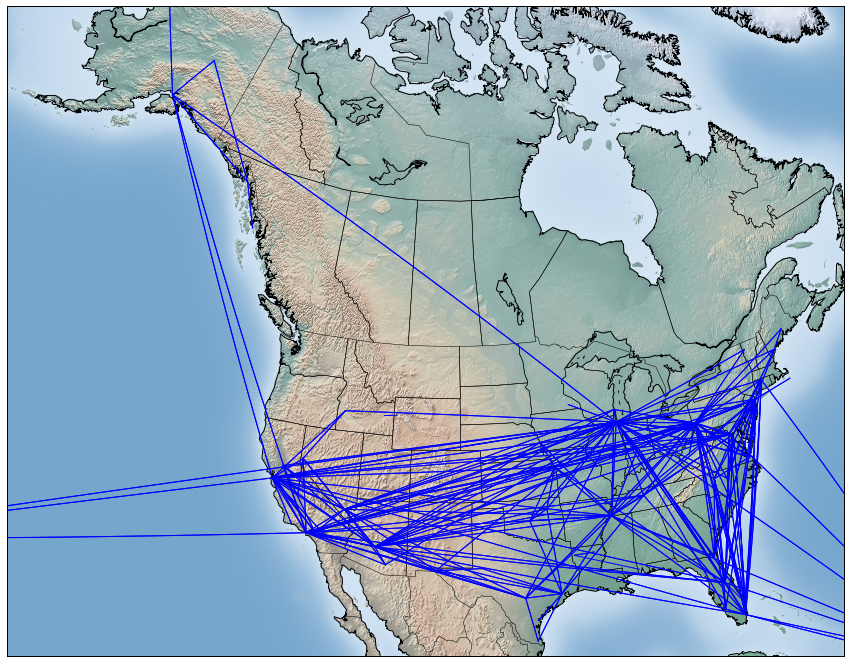

In [11]:
plt.figure(figsize=(15,15))

m = Basemap(projection='stere',lon_0=-105.,lat_0=40.,\
            llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-140,urcrnrlon=-40,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.shadedrelief()
m.drawcoastlines()
m.drawstates()
m.drawcountries()

for i in temp_1995.values:
    try:
        m.drawgreatcircle(float(i[1]), float(i[0]), float(i[3]), float(i[2]),linewidth=1,color='b')
    except ValueError:
        pass
plt.show()

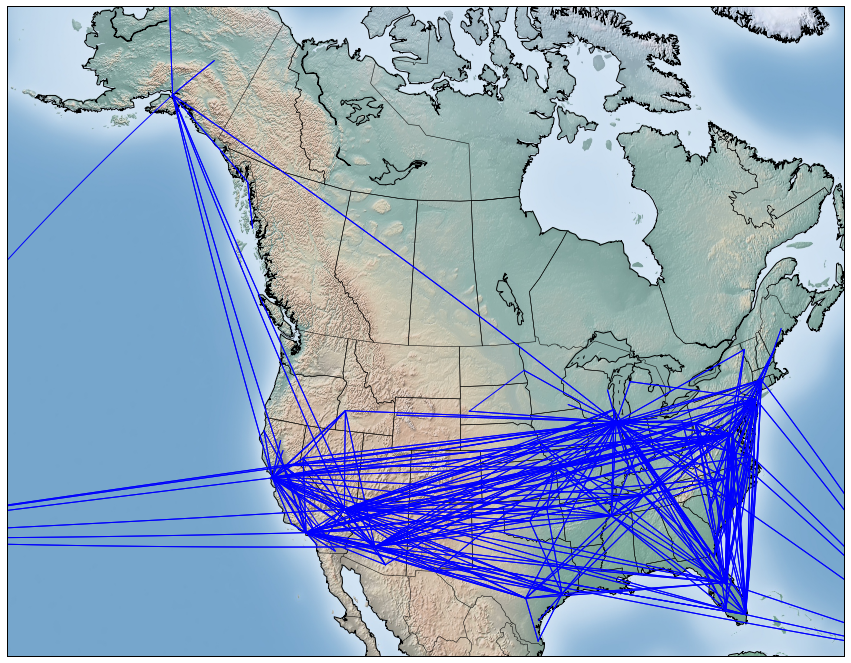

In [12]:
plt.figure(figsize=(15,15))

m = Basemap(projection='stere',lon_0=-105.,lat_0=40.,\
            llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-140,urcrnrlon=-40,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.shadedrelief()
m.drawcoastlines()
m.drawstates()
m.drawcountries()

for i in temp_2005.values:
    try:
        m.drawgreatcircle(float(i[1]), float(i[0]), float(i[3]), float(i[2]),linewidth=1,color='b')
    except ValueError:
        pass
plt.show()

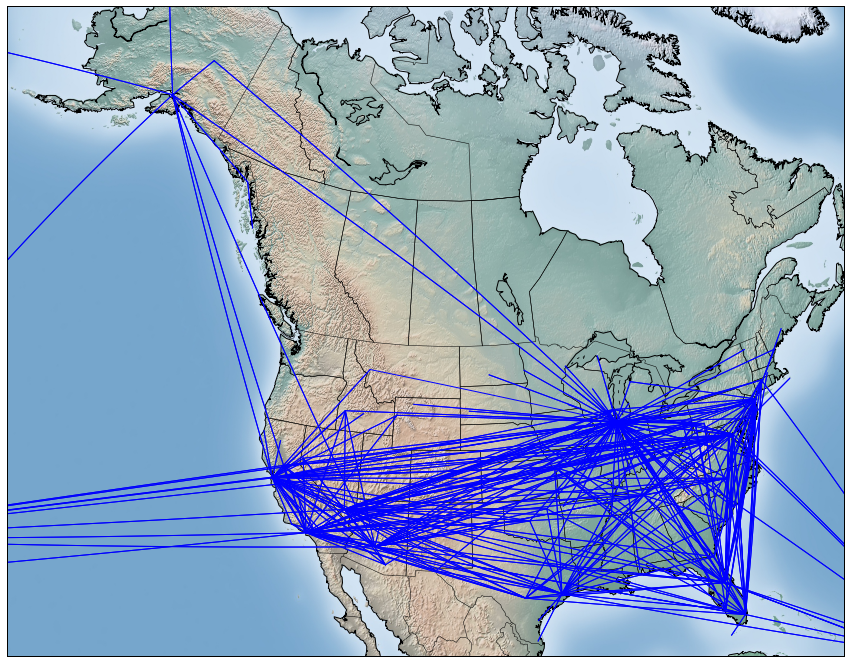

In [13]:
plt.figure(figsize=(15,15))

m = Basemap(projection='stere',lon_0=-105.,lat_0=40.,\
            llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-140,urcrnrlon=-40,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.shadedrelief()
m.drawcoastlines()
m.drawstates()
m.drawcountries()

for i in temp_2015.values:
    try:
        m.drawgreatcircle(float(i[1]), float(i[0]), float(i[3]), float(i[2]),linewidth=1,color='b')
    except ValueError:
        pass
plt.show()

In [14]:
print len(temp_1995)
print len(temp_2005)
print len(temp_2015)

474
617
651
